# Import

## Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## Dataset

In [64]:
df = pd.read_csv(r'customer_booking.csv', encoding='latin-1')

# Explore Dataset

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
print(df.wants_extra_baggage.value_counts())
print(df.route.value_counts())

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


In [6]:
df.route.value_counts().describe()

count     799.000000
mean       62.578223
std       146.462227
min         1.000000
25%         5.000000
50%        18.000000
75%        56.500000
max      2680.000000
Name: count, dtype: float64

In [7]:
route_counts = df['route'].value_counts()
routes_over_x = route_counts[route_counts > 100]
print(routes_over_x)

print(routes_over_x)

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
HKGMEL     106
ICNKCH     106
PEKSYD     103
PEKSIN     102
CNXPER     101
Name: count, Length: 122, dtype: int64
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
HKGMEL     106
ICNKCH     106
PEKSYD     103
PEKSIN     102
CNXPER     101
Name: count, Length: 122, dtype: int64


## Summarize Baggage and Flight Duration

In [31]:
# Count the total number of passengers for each route
route_passenger_counts = df.groupby('route')['num_passengers'].sum()

# Count the number of passengers who wanted extra baggage for each route
route_extra_baggage_counts = df[df['wants_extra_baggage'] == True].groupby('route')['num_passengers'].sum()

# Calculate the percentage of passengers who wanted extra baggage for each route
route_extra_baggage_percentages = (route_extra_baggage_counts / route_passenger_counts) * 100
route_avg_flight_duration = df.groupby('route')['flight_duration'].mean()

# Create a DataFrame with route, percentage of passengers with baggage, and total number of passengers
result_df = pd.DataFrame({
    'route': route_passenger_counts.index,
    '%_passengers_with_baggage': route_extra_baggage_percentages.values,
    'total_passengers': route_passenger_counts.values,
    'avg_flight_duration': route_avg_flight_duration.values
})

result_df = result_df[result_df['total_passengers']>100].sort_values(by='total_passengers',ascending=False)
result_df

,route,%_passengers_with_baggage,total_passengers,avg_flight_duration
6,AKLKUL,70.719101,4450,8.83
717,PENTPE,73.307791,1566,4.67
287,DMKKIX,77.100840,1428,7.00
436,ICNSIN,62.696629,1335,6.62
633,MELSGN,81.626016,1230,8.83
...,...,...,...,...
660,MNLSYD,64.423077,104,8.58
111,CGKPER,66.346154,104,5.62
93,CEBOOL,71.844660,103,8.83
521,KCHPVG,87.254902,102,5.33


In [32]:
result_df.describe()

,%_passengers_with_baggage,total_passengers,avg_flight_duration
count,187.000000,187.000000,187.000000
mean,70.989369,340.422460,7.170909
std,10.857942,405.369058,1.479199
min,39.869281,101.000000,4.670000
25%,64.009879,141.000000,5.620000
50%,71.764706,215.000000,7.000000
75%,78.768104,397.000000,8.750000
max,96.330275,4450.000000,8.830000


/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_passengers', ylabel='Count'>

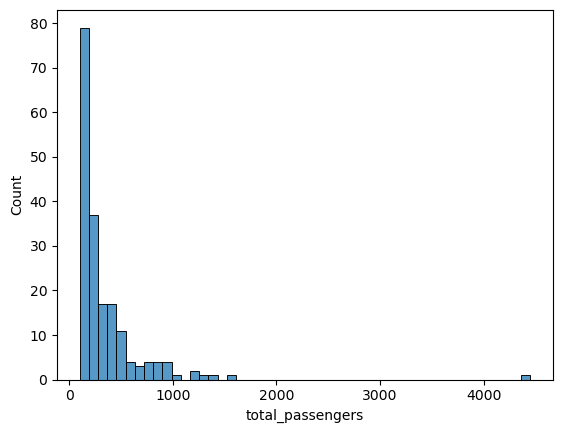

In [33]:
sns.histplot(result_df['total_passengers'])

## Visualize Major Relationships

##### Opportunity could lie for routes with:
- higher than average passenger counts
- lower than average passengers that purchase baggage (%)

/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

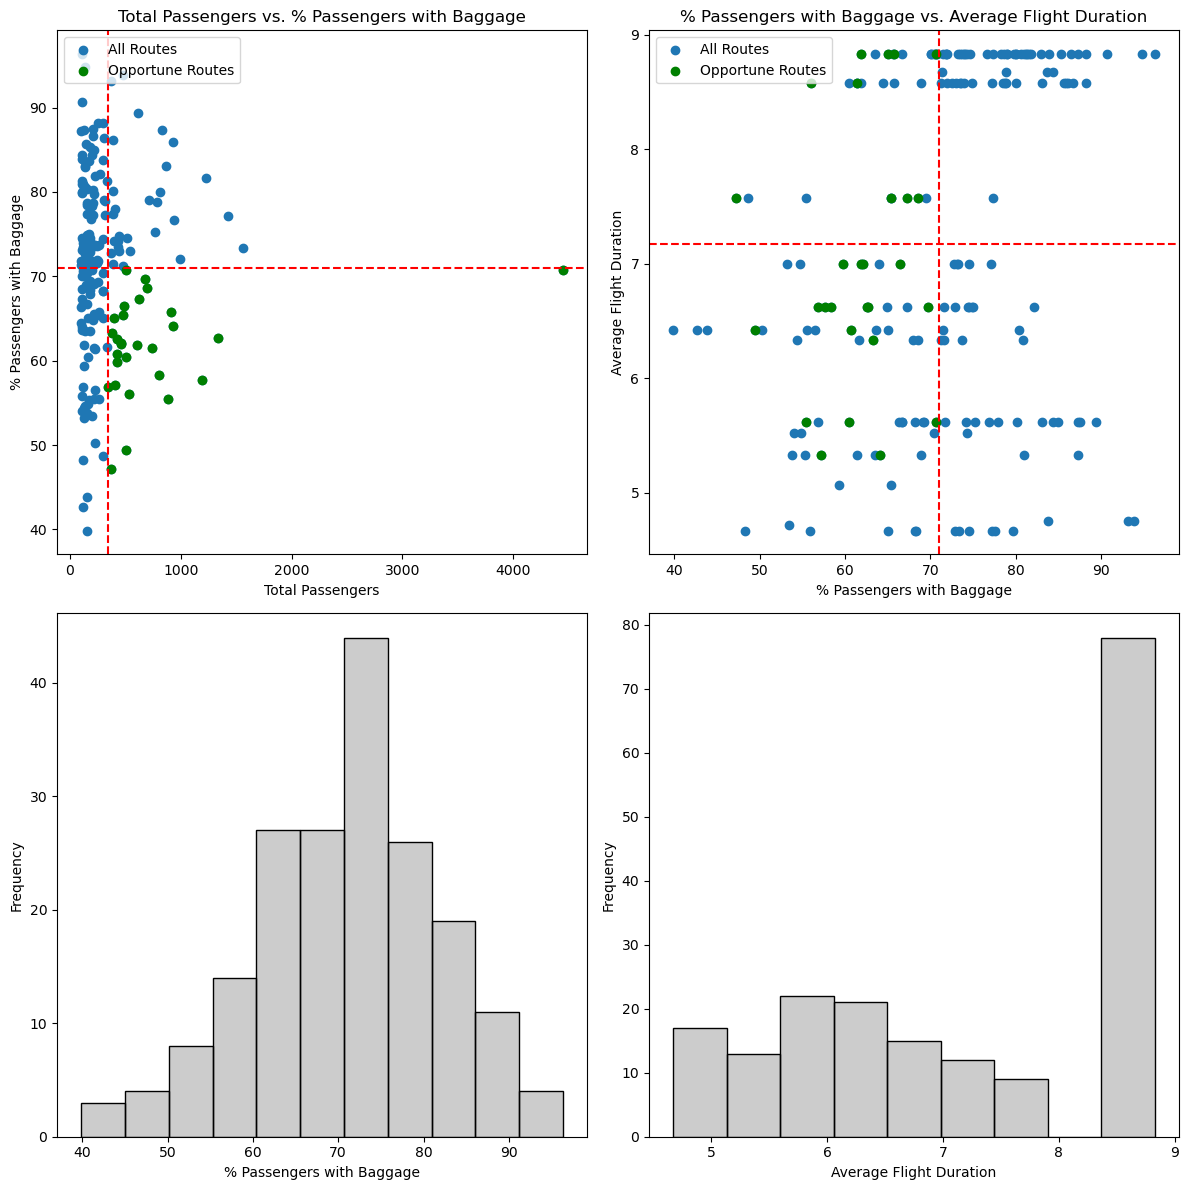

In [62]:
# Calculate means
mean_total_passengers = result_df['total_passengers'].mean()
mean_percent_baggage = result_df['%_passengers_with_baggage'].mean()
mean_flight_duration = result_df['avg_flight_duration'].mean()

# Filter routes below mean_percent_baggage but above mean_total_passengers
filtered_routes = result_df[(result_df['%_passengers_with_baggage'] < mean_percent_baggage) & 
                            (result_df['total_passengers'] > mean_total_passengers)]

# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot first subplot (scatter plot of Total Passengers vs. % Passengers with Baggage)
axs[0, 0].scatter(result_df['total_passengers'], result_df['%_passengers_with_baggage'], label='All Routes')
axs[0, 0].scatter(filtered_routes['total_passengers'], filtered_routes['%_passengers_with_baggage'], color='green', label='Opportune Routes')
axs[0, 0].set_xlabel('Total Passengers')
axs[0, 0].set_ylabel('% Passengers with Baggage')
axs[0, 0].axvline(x=mean_total_passengers, color='r', linestyle='--')
axs[0, 0].axhline(y=mean_percent_baggage, color='r', linestyle='--')
axs[0, 0].set_title('Total Passengers vs. % Passengers with Baggage')
axs[0, 0].legend(loc='upper left')

# Plot second subplot (scatter plot of % Passengers with Baggage vs. Average Flight Duration)
axs[0, 1].scatter(result_df['%_passengers_with_baggage'], result_df['avg_flight_duration'], label='All Routes')
axs[0, 1].scatter(filtered_routes['%_passengers_with_baggage'], filtered_routes['avg_flight_duration'], color='green', label='Opportune Routes')
axs[0, 1].set_xlabel('% Passengers with Baggage')
axs[0, 1].set_ylabel('Average Flight Duration')
axs[0, 1].axvline(x=mean_percent_baggage, color='r', linestyle='--')
axs[0, 1].axhline(y=mean_flight_duration, color='r', linestyle='--')
axs[0, 1].set_title('% Passengers with Baggage vs. Average Flight Duration')
axs[0, 1].legend(loc='upper left')

# Plot third subplot (histogram of % Passengers with Baggage)
sns.histplot(result_df['%_passengers_with_baggage'], ax=axs[1, 0], color='#000000', alpha=0.2)
axs[1, 0].set_xlabel('% Passengers with Baggage')
axs[1, 0].set_ylabel('Frequency')

# Plot fourth subplot (histogram of Average Flight Duration)
sns.histplot(result_df['avg_flight_duration'], ax=axs[1, 1], color='#000000', alpha=0.2)
axs[1, 1].set_xlabel('Average Flight Duration')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()

# Save all subplots in the same image
plt.savefig('combined_plots.png')

plt.show()


In [66]:
filtered_routes

,route,%_passengers_with_baggage,total_passengers,avg_flight_duration
6,AKLKUL,70.719101,4450,8.83
436,ICNSIN,62.696629,1335,6.62
300,DPSICN,57.718121,1192,6.62
309,DPSPVG,64.055794,932,5.33
291,DMKOOL,65.714286,910,8.83
293,DMKPER,55.455568,889,5.62
368,HKTICN,58.354115,802,6.62
296,DMKSYD,61.465400,737,8.58
397,HNDPEN,68.587896,694,7.57
102,CGKICN,69.674556,676,6.62


## Experimental Design

Null Hypothesis : Above average duration routes have the same % Passengers with baggage than below average duration routes.

In [70]:
pop1 = result_df[(result_df['avg_flight_duration'] < mean_flight_duration)]
pop2 = result_df[(result_df['avg_flight_duration'] >= mean_flight_duration)]

### Assumptions for 2-Sample T-Test:

#### Independence

- It's important to note that this assumption is dependent on the data collection. While this dataset does not describe the extent of the data collection, we assume that this contains data from a period of time in the Oceania region. Thus, this contains the entire population of flights in the region during the time. There can be, however, some yearly discrepancies that could violate this assumption. We will proceed with the test with this context in mind.

#### Normality

In [75]:
group1_data = pop1['%_passengers_with_baggage']
group2_data = pop2['%_passengers_with_baggage']

# Check for normality
normality_group1 = stats.shapiro(group1_data)
normality_group2 = stats.shapiro(group2_data)

print("Normality (Group 1): p-value =", normality_group1.pvalue)
print("Normality (Group 2): p-value =", normality_group2.pvalue)

Normality (Group 1): p-value = 0.926478423083329
Normality (Group 2): p-value = 0.44285004824884006


- Based on the above p-values for shapiro tests for both groups, we can conclude that there are no significant deviations from normality.

#### Metric Scale

- In this test, we are comparing the average percentage of passengers that purchase baggages on flights, between the two groups. This implies the comparison of metric scales, and thus we can satisfy this assumption and proceed with the two-sample t-test.

### Execute 2-Sample T-Test

In [80]:
# Extract data for the two groups
group1_data = pop1['%_passengers_with_baggage']
group2_data = pop2['%_passengers_with_baggage']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)  # Set equal_var=False if variances are unequal

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -4.4304547949910225
P-value: 1.6082733539232e-05


### Conclusion

- The p-value is less than the significance level 0.05. We do NOT reject the null hypothesis of equal means. This suggests that there is significant evidence to conclude that the means of the two groups are not different.

- Practically, this suggests that above-average or below-average flight durations do not have a statistically significant impact on the percentage of passengers that purchase a baggage.

#### Let's take another step. 

- This can suggest that there are a multitude of factors, not just flight duration, that influence the purchase of bags on a given flight route. We will use machine learning to predict passengers that are likely to purchase bags given the other variables within the dataset. 

- For opportune routes (that underperform on the average percentage of baggage purchases in Oceania routes), identifying customers that are more willing to buy baggage on these routes for promotional strategies would be ideal in improving baggage conversion as well as marginal revenue improvements.